In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Some global variables

data_folder = "../Data/"
features = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']

In [3]:
# Read training data for exploration

train_df = pd.read_csv(data_folder + 'train.csv')

print(train_df.shape)
train_df.head()

(177024, 508)


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


Number of patients:  9
Mean number of samples per patient:  19669.33
Min number of samples per patient:  8288
Max number of samples per patient:  26028


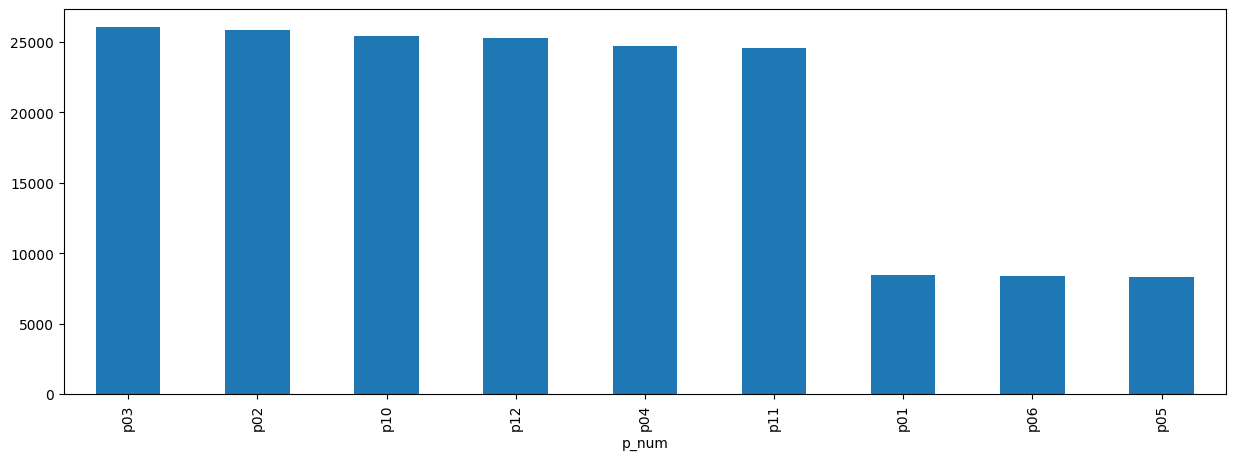

In [4]:
# Check if the training data samples are balanced accross different patient numbers

p_num_count = train_df['p_num'].value_counts()
p_num_count.plot(kind='bar', figsize=(15, 5))

print("Number of patients: ", len(p_num_count))
print("Mean number of samples per patient: ", round(p_num_count.mean(), 2))
print("Min number of samples per patient: ", p_num_count.min())
print("Max number of samples per patient: ", p_num_count.max())

In [5]:
# Check if there are any duplicate ids in the training data

duplicate_ids = train_df['id'].duplicated().sum()
print(f"Number of duplicate ids: {duplicate_ids}")

Number of duplicate ids: 0


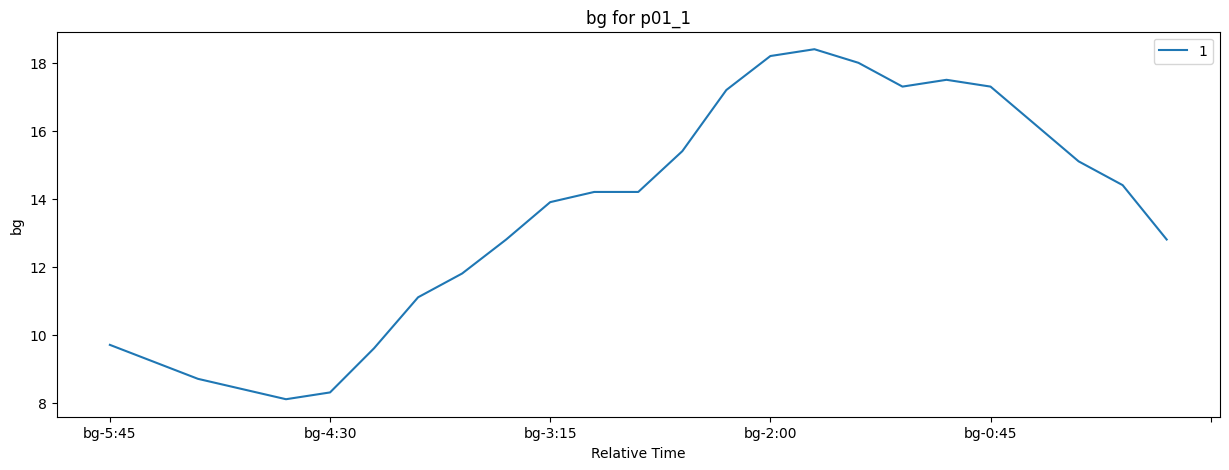

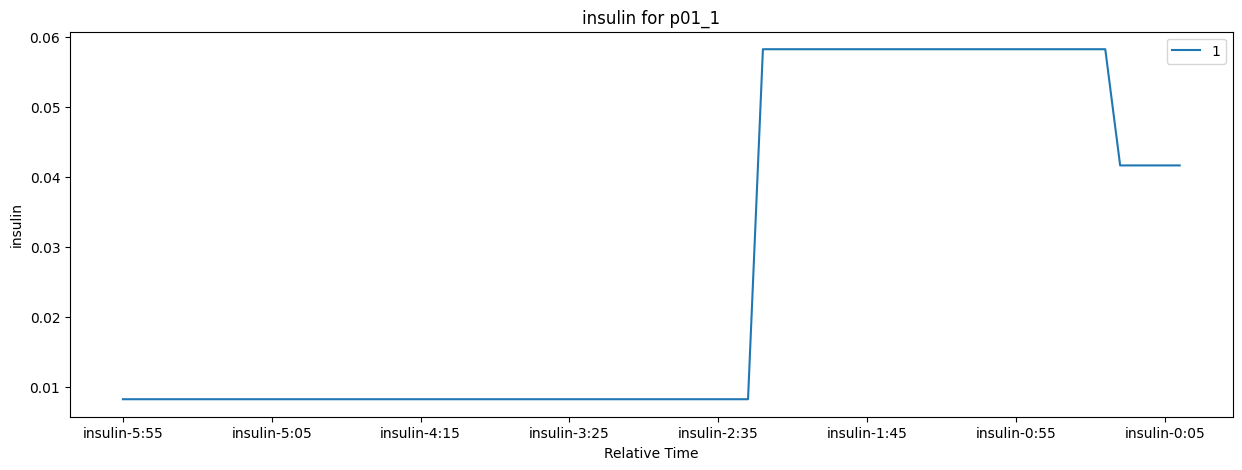

No data available for carbs in p01_1
No data available for hr in p01_1
No data available for steps in p01_1
No data available for cals in p01_1


In [6]:
# Visulaize numeric features of a sample

select_id = "p01_1"

for feature in features:
    
    # Skip non-numeric features
    if feature is 'activity':
        continue
    
    # Select relevant data for the plot
    feature_cols = [col for col in train_df.columns if col.startswith(feature)]
    selected_data = train_df.loc[train_df['id'] == select_id, feature_cols]
    
    # Skip if no data available
    if selected_data.T.dropna().empty:
        print(f"No data available for {feature} in {select_id}")
        continue
    
    # Plot the data
    selected_data.T.dropna().plot(kind='line', figsize=(15, 5))
    plt.xlabel('Relative Time')
    plt.ylabel(feature)
    plt.title(f'{feature} for {select_id}')
    plt.show()

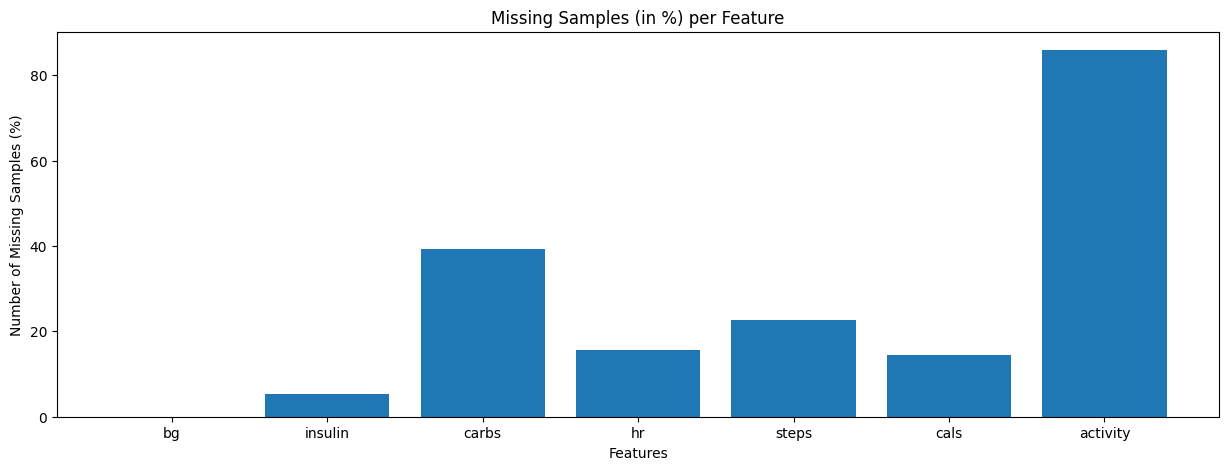

In [7]:
# Check how many samples have missing features 
# A feature is considered to be missing in a sample if it has no data point available in the given historical 6 hours

missing_ft_count = {}
missing_ft_percentage = {}

for feature in features:
    
    feature_cols = [col for col in train_df.columns if col.startswith(feature)]
    missing_sample_count = int(train_df[feature_cols].isnull().all(axis=1).sum())
    
    missing_ft_count[feature] = missing_sample_count
    missing_ft_percentage[feature] = missing_sample_count / train_df.shape[0] * 100

# Plot the missing samples per feature bar chart
plt.figure(figsize=(15, 5))    
plt.bar(missing_ft_percentage.keys(), missing_ft_percentage.values())
plt.xlabel('Features')
plt.ylabel('Number of Missing Samples (%)')
plt.title('Missing Samples (in %) per Feature')
plt.show()

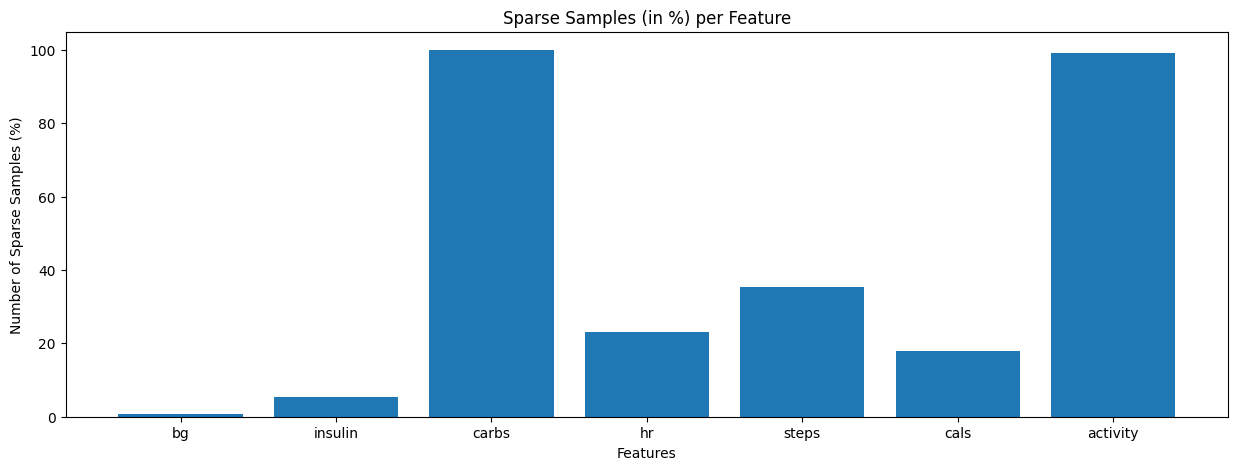

In [8]:
# Check how many samples have sparse features for each patient
# A feature is considered to be sparse in a sample if it has less than certain percentage available in the given historical 6 hours

sparse_precentage = 0.25
sparse_ft_count = {}
sparse_ft_percentage = {}

for feature in features:
    
    feature_cols = [col for col in train_df.columns if col.startswith(feature)]
    sparse_sample_count = int((train_df[feature_cols].notnull().sum(axis=1) < sparse_precentage * len(feature_cols)).sum())
    
    sparse_ft_count[feature] = sparse_sample_count
    sparse_ft_percentage[feature] = sparse_sample_count / train_df.shape[0] * 100

# Plot the sparse samples per feature bar chart
plt.figure(figsize=(15, 5))
plt.bar(sparse_ft_percentage.keys(), sparse_ft_percentage.values()) 
plt.xlabel('Features')
plt.ylabel('Number of Sparse Samples (%)')
plt.title('Sparse Samples (in %) per Feature')
plt.show()

Top 50 correlated features ['bg+1:00', 'bg-0:00', 'bg-0:05', 'bg-0:10', 'bg-0:15', 'bg-0:20', 'bg-0:25', 'bg-0:30', 'bg-0:35', 'bg-0:45', 'bg-0:40', 'bg-0:50', 'bg-1:00', 'bg-0:55', 'bg-1:05', 'bg-1:15', 'bg-1:10', 'bg-1:20', 'bg-1:30', 'bg-1:25', 'bg-1:35', 'bg-1:45', 'bg-1:40', 'bg-1:50', 'bg-2:00', 'bg-1:55', 'bg-2:05', 'bg-2:15', 'bg-2:10', 'bg-2:20', 'bg-2:30', 'bg-2:25', 'bg-2:45', 'bg-2:35', 'bg-2:40', 'bg-3:00', 'bg-2:50', 'bg-2:55', 'carbs-2:35', 'carbs-2:20', 'bg-3:15', 'carbs-2:50', 'bg-3:05', 'carbs-2:30', 'bg-3:10', 'carbs-2:45', 'carbs-2:25', 'carbs-2:05', 'carbs-2:40', 'carbs-2:55', 'bg-3:30']


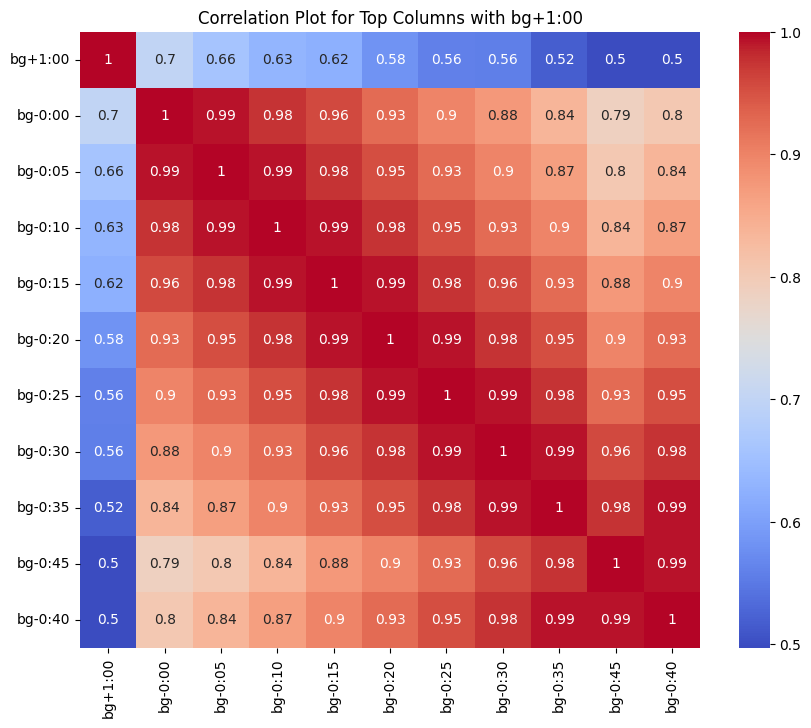

In [9]:
# Check the correlation between the features and the target variable

# Filter only the numeric features
corr_data_df = train_df.copy()
corr_data_df.drop(columns=['id', 'p_num', 'time'], inplace=True)
feature_cols = [col for col in corr_data_df.columns if not col.startswith("activity")]
corr_data_df = corr_data_df[feature_cols]

# Compute the base correlation matrix
corr_matrix = corr_data_df.corr()

# Get the top columns correlated with the target
top_10_corr_columns = corr_matrix['bg+1:00'].abs().sort_values(ascending=False).head(11).index
top_50_corr_columns = corr_matrix['bg+1:00'].abs().sort_values(ascending=False).head(51).index
print("Top 50 correlated features", list(top_50_corr_columns))

# Create a correlation matrix for the top columns
top_corr_matrix = corr_data_df[top_10_corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot for Top Columns with bg+1:00')
plt.show()